### Project Overview

**About the company**

Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.        

**The business case**

As a data specialist working for Salifort Motors, I have received the results of a recent employee survey. The senior leadership team has tasked me with analyzing the data to come up with ideas for how to increase employee retention. To help with this, they would like me to design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points I think are helpful. 

**The value of the deliverable**

For this deliverable, I am asked to choose a method to approach this data challenge based on my prior work, selecting either a regression model or a machine learning model to predict whether an employee will leave the company.



### Data Dictionary

This project uses a dataset called HR_capstone_dataset.csv. It represents 10 columns of self-reported information from employees of a fictitious multinational vehicle manufacturing corporation. 

The dataset contains:

14,999 rows – each row is a different employee’s self-reported information

10 columns

| Column Name            | Type   | Description                                           |
|------------------------|--------|-------------------------------------------------------|
| satisfaction_level     | int64  | The employee’s self-reported satisfaction level [0-1] |
| last_evaluation        | int64  | Score of employee's last performance review [0–1]    |
| number_project         | int64  | Number of projects employee contributes to            |
| average_monthly_hours  | int64  | Average number of hours employee worked per month     |
| time_spend_company     | int64  | How long the employee has been with the company (years)|
| work_accident          | int64  | Whether or not the employee experienced an accident while at work|
| left                   | int64  | Whether or not the employee left the company           |
| promotion_last_5years  | int64  | Whether or not the employee was promoted in the last 5 years|
| department             | str    | The employee's department                             |
| salary                 | str    | The employee's salary (low, medium, or high)           |


### Executive Summary

Salifort Motors is a fictitious French-based alternative energy vehicle manufacturer with a global workforce of over 100,000 employees. They specialize in researching, designing, constructing, validating, and distributing electric, solar, algae, and hydrogen-based vehicles. Salifort Motors' end-to-end vertical integration model positions them as a global leader in the intersection of alternative energy and the automobile industry.

The business challenge at hand is to address the issue of employee retention within the organization. As a data specialist working for Salifort Motors, the goal is to analyze the data from a recent employee survey and develop strategies to improve employee retention. To facilitate this analysis, a predictive model has been requested, capable of forecasting whether an employee is likely to leave the company. This model will be built on various data points, including department, number of projects, average monthly hours worked, and additional relevant factors.

**Value of the Deliverable:**

The primary objective of this project is to create a model that predicts employee attrition. The successful implementation of this predictive model will equip Salifort Motors with valuable insights, enabling them to make data-driven decisions to retain their workforce. A comprehensive analysis of the HR dataset has been conducted, and data preprocessing, exploratory data analysis, and feature engineering have been carried out to prepare the data for model development.

**Recommendation:**

After extensive analysis and model development, the recommendation is to deploy the XGBRFClassifier, a machine learning model that has demonstrated exceptional predictive power in this scenario. It is crucial for Salifort Motors to use this model to assess employee retention risks proactively. This model achieves remarkable results with an accuracy of 98.05%, showcasing the ability to identify employees who are likely to leave the company. Additionally, it maintains a high level of precision, ensuring that when it predicts an employee will leave, it is accurate 98.69% of the time. The model also demonstrates excellent recall, meaning it identifies 93.06% of all actual employees who decide to leave.

In conclusion, this predictive model is poised to become an indispensable tool for Salifort Motors in managing employee retention. By implementing the XGBRFClassifier and incorporating it into their HR processes, the company can identify high-risk employees and take targeted actions to retain their valuable workforce. This initiative will contribute to the company's long-term stability and success while ensuring that it remains at the forefront of the alternative energy and automobile industry.

Code:

### Data Validation & EDA:

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
# import data
data = pd.read_csv('/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv')

# view data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# view info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# view discription
data.describe(include='all').replace(np.nan, ' ')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999,14999
unique,,,,,,,,,10,3
top,,,,,,,,,sales,low
freq,,,,,,,,,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268,,
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,,
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,,
25%,0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0,,
50%,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,,
75%,0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0,,


In [5]:
# column names
for i in data.columns:
    print(i)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [6]:
# correct column names
data.rename(columns={'average_montly_hours':'average_monthly_hours', 
                     'Work_accident':'work_accident'}, inplace=True)

In [7]:
# missing values
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
# duplicate values
data.duplicated().sum()

3008

There are 3008 duplicate values. Since there's no ID column or any other idenifyer, I'll keep these values.

In [9]:
# get outliers

# import zscore
from scipy.stats import zscore

# set a threshold for Z-score
zscore_threshold = 3

# loop through each column
for column in data.columns:
    
    # check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        
        # calculate Z-scores for each data point in the column
        z_scores = zscore(data[column])
        
        # identify outliers using the Z-score
        outliers = (z_scores > zscore_threshold) | (z_scores < -zscore_threshold)
        
        # print the column name and the number of outliers
        print(f"Column: {column}, Number of outliers: {outliers.sum()}")

Column: satisfaction_level, Number of outliers: 0
Column: last_evaluation, Number of outliers: 0
Column: number_project, Number of outliers: 0
Column: average_monthly_hours, Number of outliers: 0
Column: time_spend_company, Number of outliers: 376
Column: work_accident, Number of outliers: 0
Column: left, Number of outliers: 0
Column: promotion_last_5years, Number of outliers: 319


In [10]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
# first 5 rows
data[:5]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


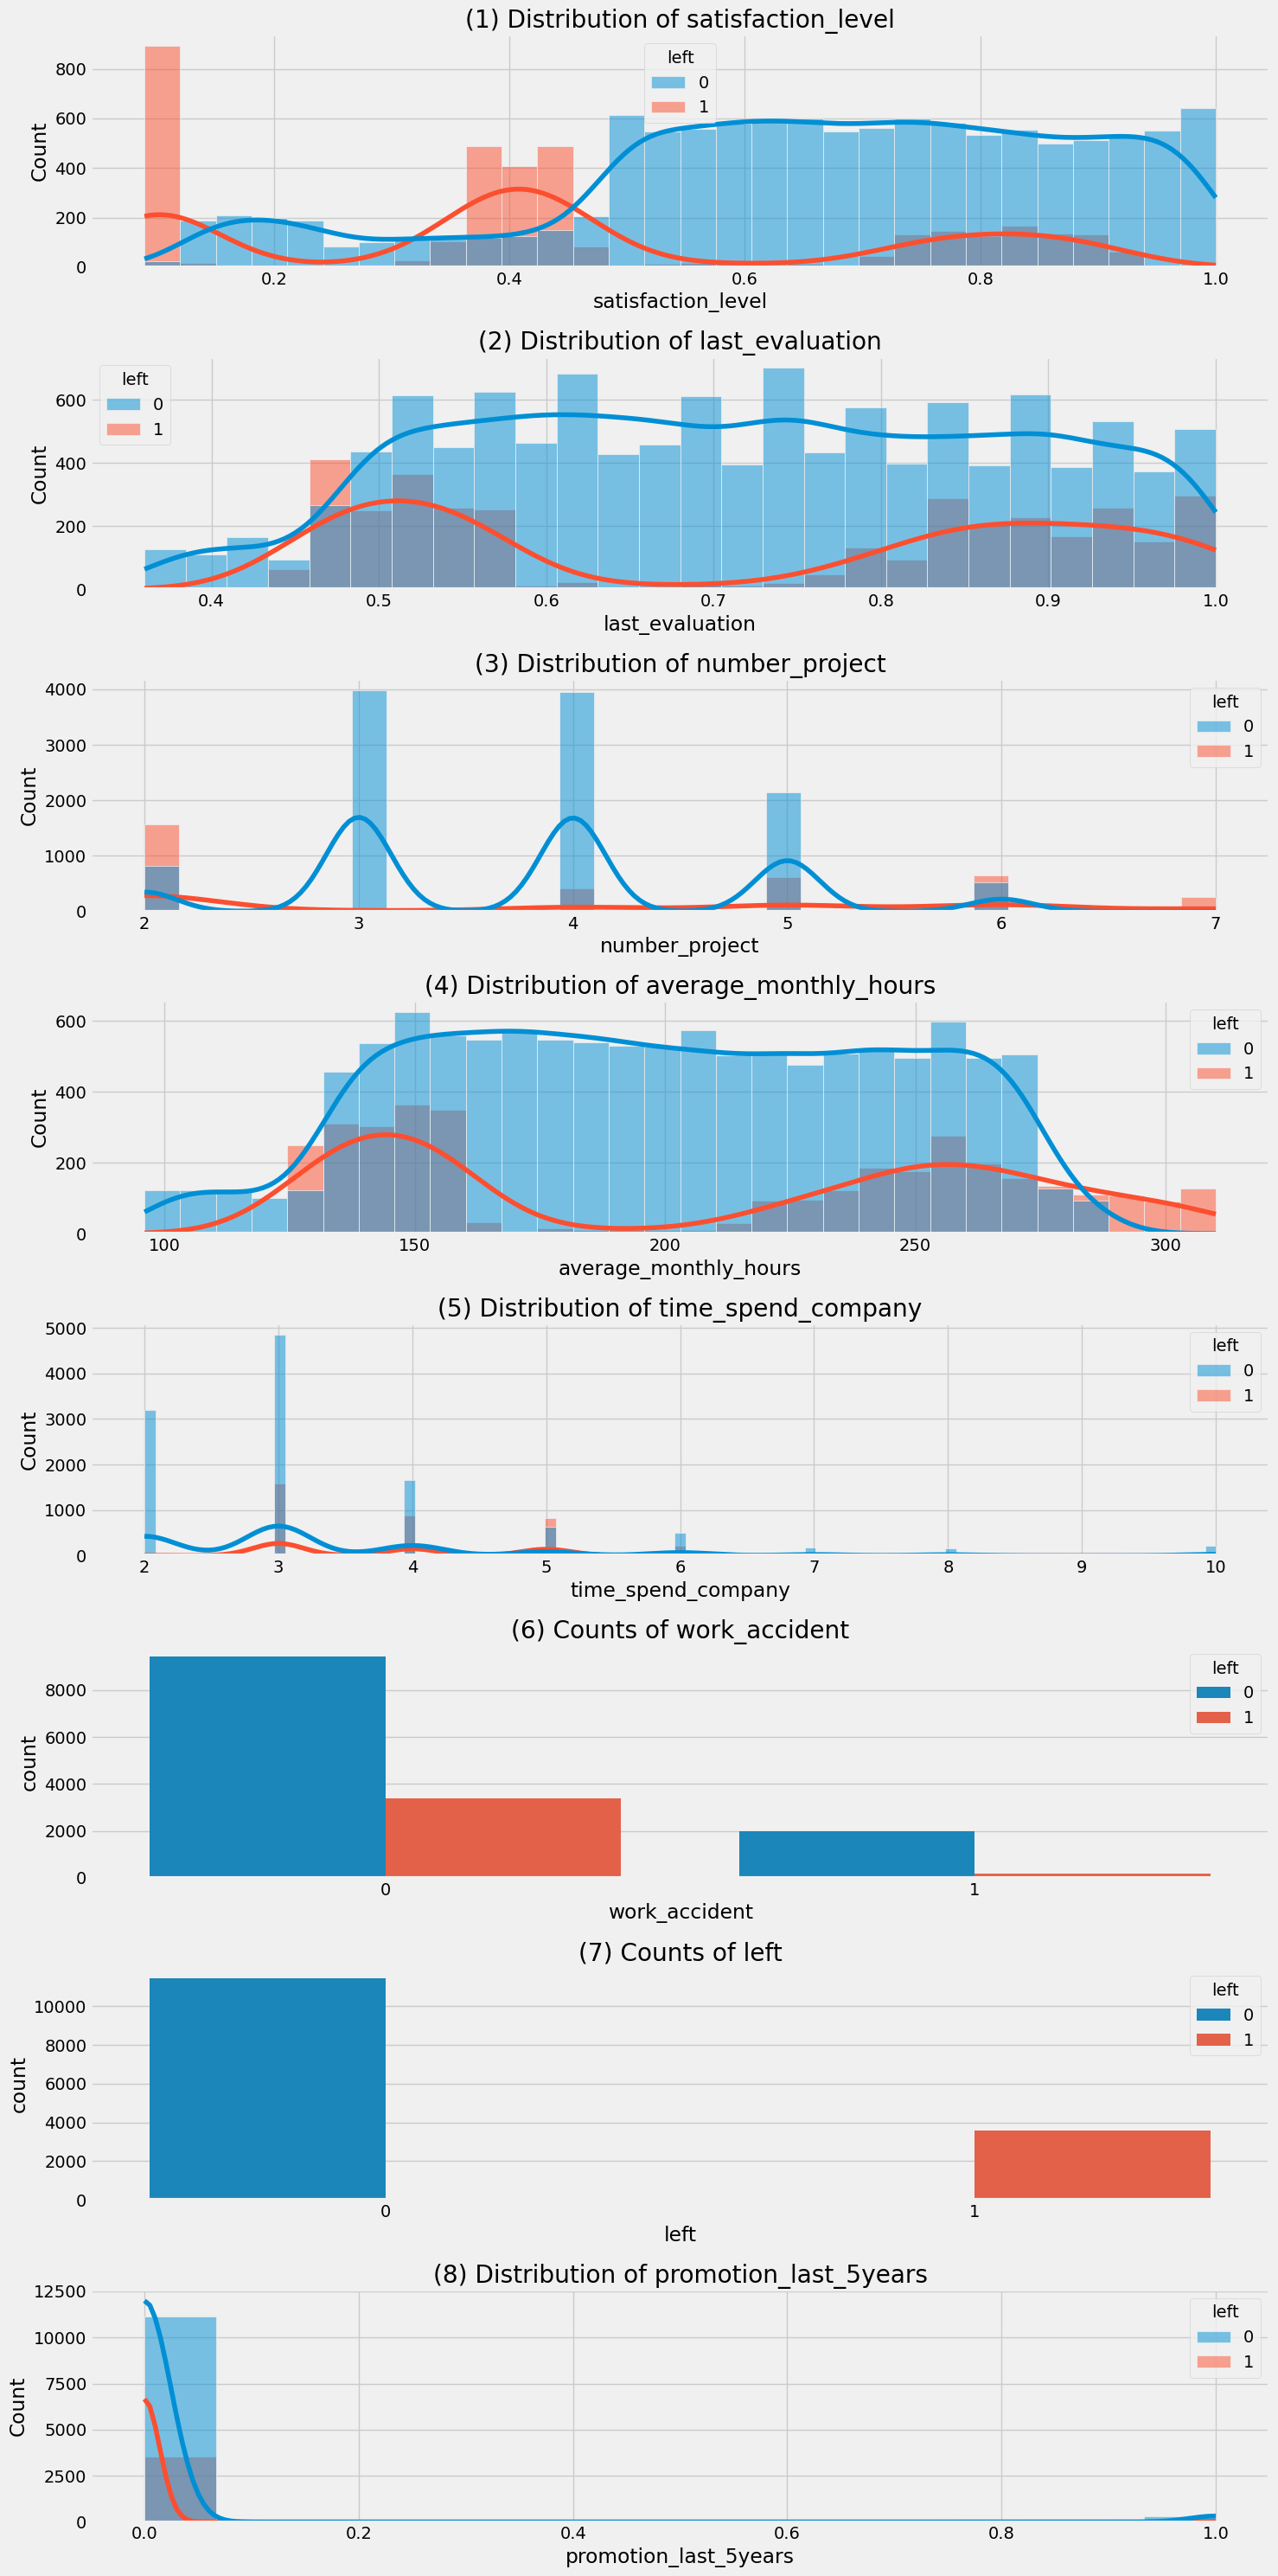

In [12]:
# set figure & size
fig, axes = plt.subplots(8,1, figsize=(15,30))

# (3) Distribution of satisfaction_level
sns.histplot(data=data, x='satisfaction_level', hue='left', ax=axes[0], kde=True)
axes[0].set_title('(1) Distribution of satisfaction_level')

# (3) Distribution of last_evaluation
sns.histplot(data=data, x='last_evaluation', hue='left', ax=axes[1], kde=True)
axes[1].set_title('(2) Distribution of last_evaluation')

# (3) Distribution of number_project
sns.histplot(data=data, x='number_project', hue='left', ax=axes[2], kde=True)
axes[2].set_title('(3) Distribution of number_project')

# (4) Distribution of average_monthly_hours
sns.histplot(data=data, x='average_monthly_hours', hue='left', ax=axes[3], kde=True)
axes[3].set_title('(4) Distribution of average_monthly_hours')

# (5) Distribution of time_spend_company
sns.histplot(data=data, x='time_spend_company', hue='left', ax=axes[4], kde=True)
axes[4].set_title('(5) Distribution of time_spend_company')

# (6) Distribution of work_accident
sns.countplot(data=data, x='work_accident', hue='left', ax=axes[5])
axes[5].set_title('(6) Counts of work_accident')

# (7) Distribution of left
sns.countplot(data=data, x='left', hue='left', ax=axes[6])
axes[6].set_title('(7) Counts of left')

# (8) Distribution of promotion_last_5years
sns.histplot(data=data, x='promotion_last_5years', hue='left', ax=axes[7], kde=True)
axes[7].set_title('(8) Distribution of promotion_last_5years')

# clean vizzs
plt.tight_layout()

It seems that satisfaction level has some correlation with the left variable. Makes sense.

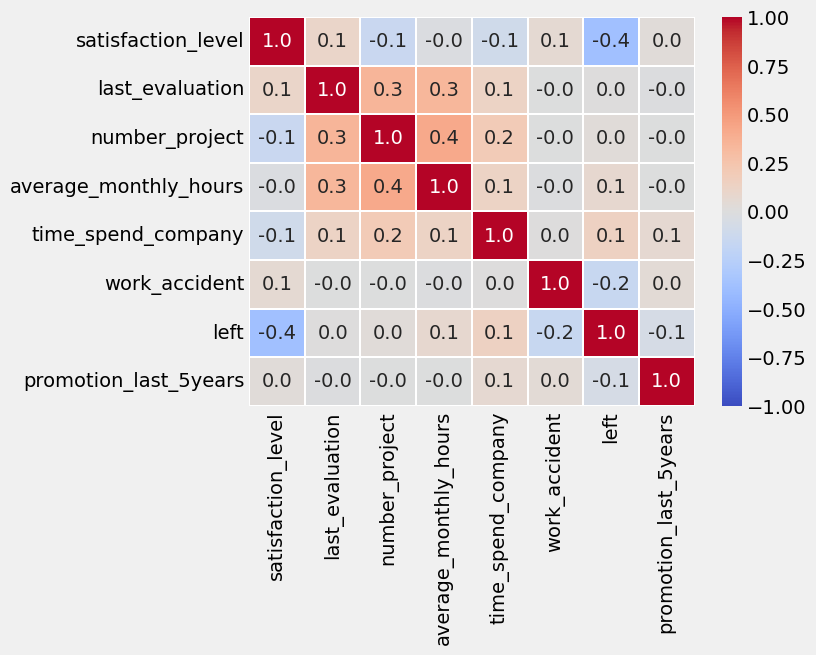

In [13]:
sns.heatmap(data.corr(numeric_only=True), 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            fmt='.1f', 
            linewidths=0.05, 
            cmap="coolwarm", 
            square=False);

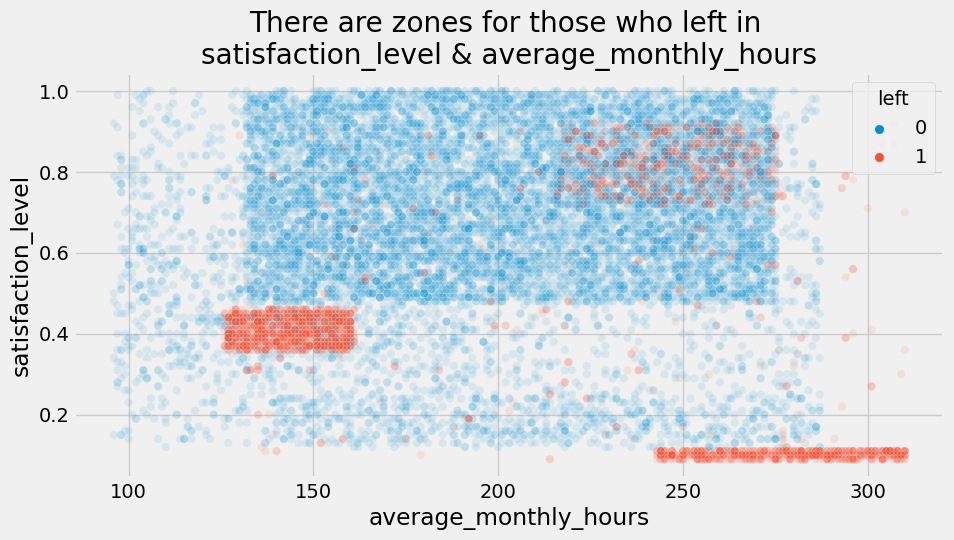

In [14]:
# plot scatter for satisfaction_level & average_monthly_hours
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.1)
plt.title('There are zones for those who left in \nsatisfaction_level & average_monthly_hours');

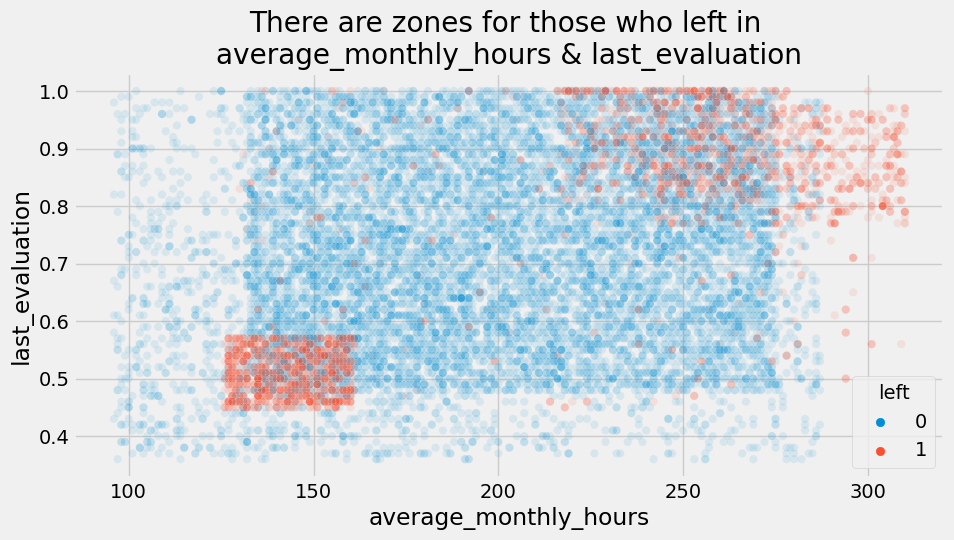

In [15]:
# plot scatter for average_monthly_hours & last_evaluation
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.1)
plt.title('There are zones for those who left in \naverage_monthly_hours & last_evaluation');

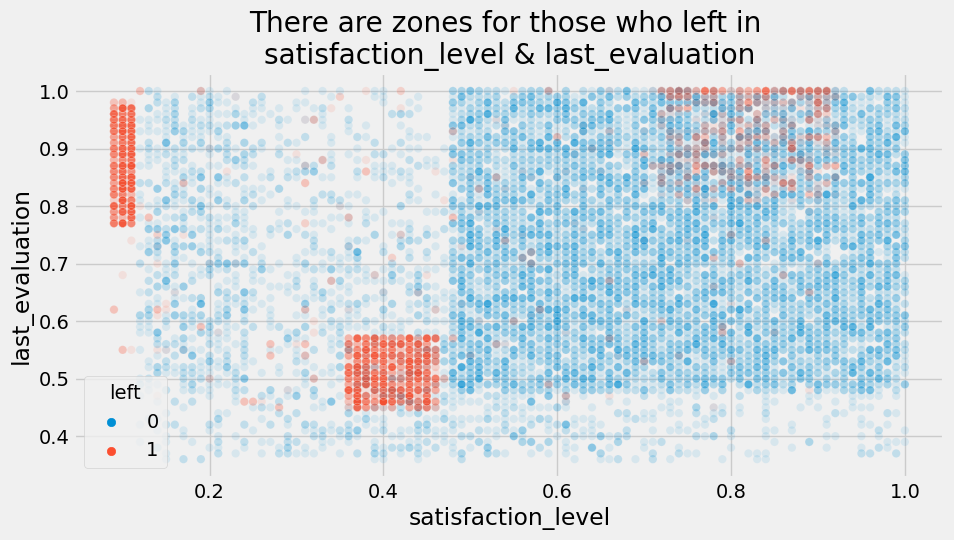

In [16]:
# plot scatter for average_monthly_hours & last_evaluation
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x='satisfaction_level', y='last_evaluation', hue='left', alpha=0.1)
plt.title('There are zones for those who left in \nsatisfaction_level & last_evaluation');

### Feature Engineering

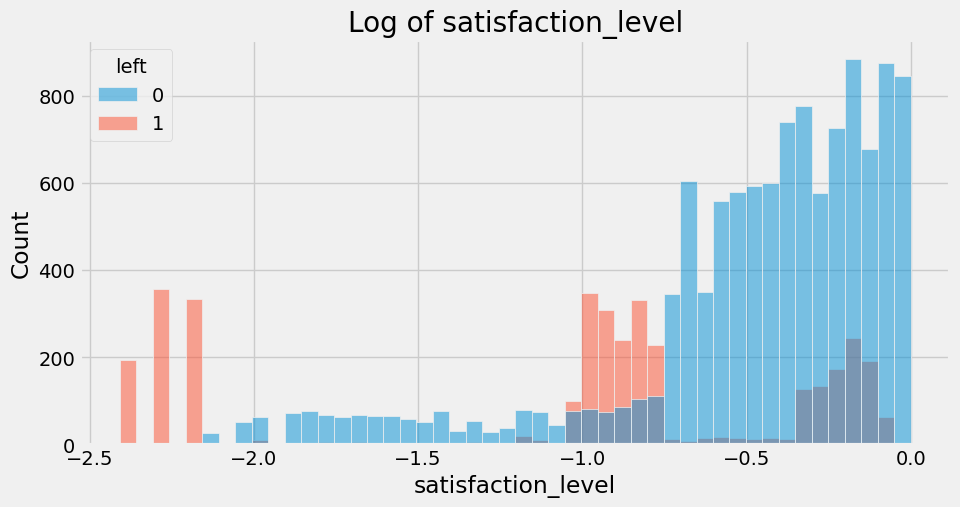

In [17]:
# plot Log of satisfaction_level
plt.figure(figsize=(10,5))
sns.histplot(x=np.log(data.satisfaction_level), hue=data.left)
plt.title('Log of satisfaction_level');

In [18]:
# add new column (log)
data['log_satisfaction'] = np.log(data.satisfaction_level)

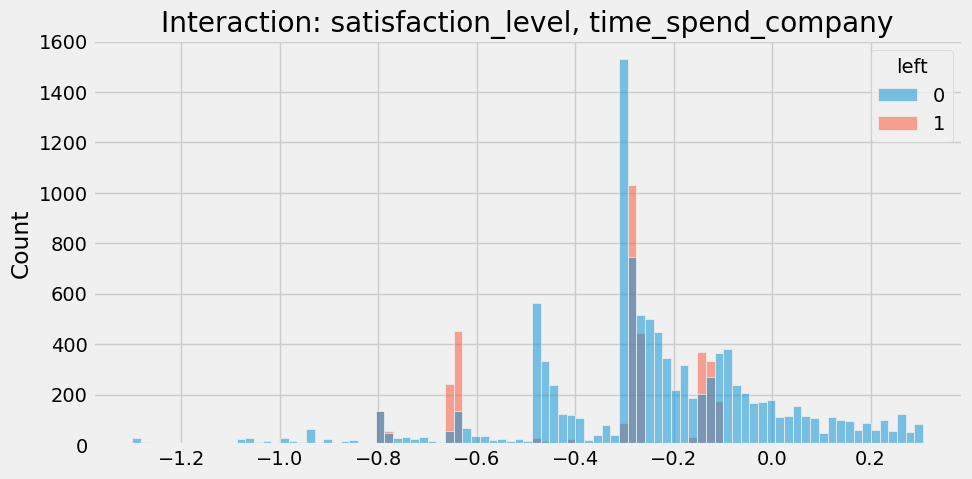

In [19]:
# plot Log of satisfaction_level
plt.figure(figsize=(10,5))
sns.histplot(x=(data.satisfaction_level - np.log(data.time_spend_company))*data.satisfaction_level, hue=data.left)
plt.title('Interaction: satisfaction_level, time_spend_company');

In [20]:
data['intra_sat_time'] = (data.satisfaction_level - np.log(data.time_spend_company))*data.satisfaction_level

### Data Preprocessing

In [21]:
# import model tools
from xgboost import XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [22]:
# data preprocessing
data = pd.get_dummies(data, dtype='int8')
data.average_monthly_hours = ((data.average_monthly_hours - data.average_monthly_hours.mean()) / data.average_monthly_hours.mean())

# data now
data[:5]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,log_satisfaction,intra_sat_time,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,-0.219101,3,0,1,0,-0.967584,-0.273073,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.303156,6,0,1,0,-0.223144,-0.793408,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.352895,4,0,1,0,-2.207275,-0.140392,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,0.109175,5,0,1,0,-0.328504,-0.640395,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,-0.209153,3,0,1,0,-0.994252,-0.269587,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# split data
X = data.copy()
y = X.left
X = X.drop(columns=['left'])

# check data
display(y[:3])
display(X[:3])

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# get shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

0    1
1    1
2    1
Name: left, dtype: int64

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,log_satisfaction,intra_sat_time,Department_IT,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,-0.219101,3,0,0,-0.967584,-0.273073,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,0.303156,6,0,0,-0.223144,-0.793408,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,0.352895,4,0,0,-2.207275,-0.140392,0,...,0,0,0,0,1,0,0,0,0,1


(11249, 22) (3750, 22) (11249,) (3750,)


In [24]:
# standardize data

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Base Model

Logistic Regression

In [25]:
# baseline model
lr = LogisticRegression(random_state=1)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# evaluation
print("Accuracy:", metrics.accuracy_score(y_test, lr_pred), '\n')
print("Precision:", metrics.precision_score(y_test, lr_pred), '\n')
print("Recall:", metrics.recall_score(y_test, lr_pred), '\n')
print("F1 Score:", metrics.f1_score(y_test, lr_pred), '\n')
print("roc_auc_score:", metrics.roc_auc_score(y_test,  lr.predict_proba(X_test_scaled)[:, 1]), '\n')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, lr_pred), '\n')
print("Classification Report:\n", metrics.classification_report(y_test, lr_pred))

Accuracy: 0.8704 

Precision: 0.7619047619047619 

Recall: 0.6629339305711086 

F1 Score: 0.7089820359281437 

roc_auc_score: 0.9261729603837415 

Confusion Matrix:
 [[2672  185]
 [ 301  592]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      2857
           1       0.76      0.66      0.71       893

    accuracy                           0.87      3750
   macro avg       0.83      0.80      0.81      3750
weighted avg       0.87      0.87      0.87      3750



Here's an interpretation of the evaluation metrics for the base model:

1. **Accuracy**: The model's overall accuracy is 87.04%, indicating that it correctly predicted the class labels for 87.04% of the samples.

2. **Precision**: For class 1, the precision is 76.19%, which means that out of all the instances the model predicted as class 1, 76.19% were correct.

3. **Recall**: The recall for class 1 is 66.29%, indicating that the model correctly identified 66.29% of all actual class 1 instances.

4. **F1 Score**: The F1 score is 70.90%, which is the harmonic mean of precision and recall, providing a balance between the two.

5. **roc_auc_score**: The ROC AUC score is 92.62%, suggesting that the model performs well in distinguishing between the two classes.

6. **Confusion Matrix**: The matrix shows that the model made 2672 correct predictions for class 0 and 592 correct predictions for class 1. It also misclassified 185 instances of class 0 as class 1 and 301 instances of class 1 as class 0.

7. **Classification Report**: This report provides a breakdown of precision, recall, and F1 score for both classes (0 and 1). It also includes the overall accuracy, macro average (useful for imbalanced datasets), and weighted average (considering class distribution) of these metrics.

In summary, the base model has good accuracy, precision, and ROC AUC score, indicating its effectiveness in classification. However, it could be further fine-tuned to improve recall, especially for class 1.

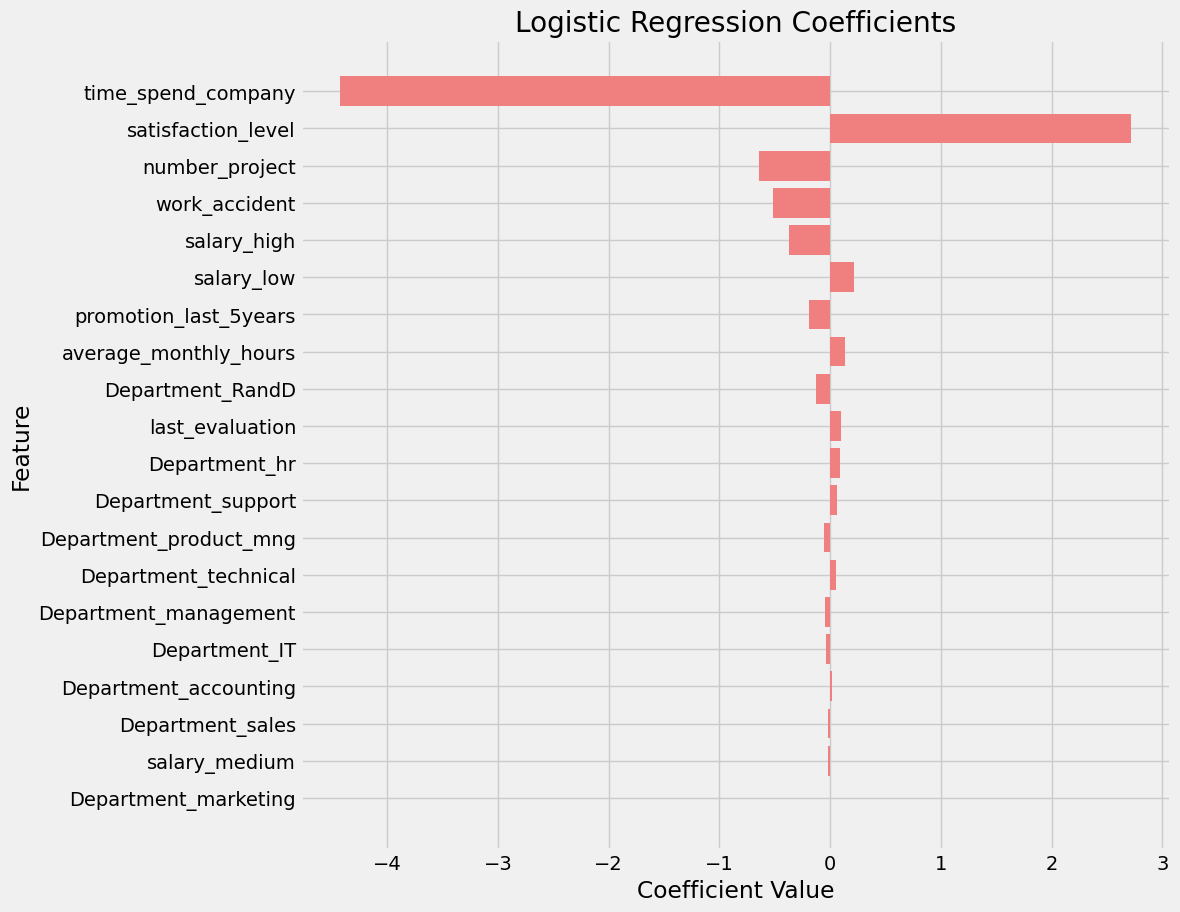

In [26]:
# get coefficients from model
coefficients = lr.coef_[0]
feature_names = X_train.columns

# create a DataFrame 
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# sort the DataFrame by absolute coefficient values for better visualization
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=True)
coef_df = coef_df[:-2][:]

# plot the coefficients
plt.figure(figsize=(10, 10))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='lightcoral')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

Let's break down the explanation for each feature:

1. **Time Spent in the Company (-4.42):**
   - **Explanation:** The feature "time_spend_company" has a negative coefficient of -4.42. This means that as the time an employee spends in the company increases, the likelihood of them leaving decreases significantly. Employees with more tenure are less likely to leave.
2. **Satisfaction Level (2.72):**
   - **Explanation:** The "satisfaction_level" has a positive coefficient of 2.72, indicating that higher satisfaction levels positively influence employee retention. As satisfaction increases, the likelihood of an employee staying also increases significantly.
3. **Number of Projects (-0.64):**
   - **Explanation:** The "number_project" feature has a negative coefficient of -0.64. This suggests that as the number of projects an employee is involved in decreases, the likelihood of them leaving slightly decreases. However, the impact is relatively modest.
4. **Work Accident (-0.51):**
   - **Explanation:** The "work_accident" feature has a negative coefficient of -0.51. Employees who have experienced a work accident are slightly more likely to leave. This negative coefficient implies a modest impact on retention.
5. **High Salary (-0.37):**
   - **Explanation:** Surprisingly, the "salary_high" feature has a negative coefficient of -0.37, suggesting that employees with higher salaries are somewhat more likely to leave. This unexpected result might indicate that other factors, beyond salary, influence their decision to stay or leave.
6. **Low Salary (0.22):**
   - **Explanation:** Conversely, the "salary_low" feature has a positive coefficient of 0.22. This implies that employees with lower salaries are slightly more likely to leave, though the impact is not as strong as with high salaries.
7. **Promotion in the Last 5 Years (-0.19):**
   - **Explanation:** The "promotion_last_5years" feature has a negative coefficient of -0.19, indicating that employees who haven't been promoted in the last 5 years are slightly more likely to leave.
8. **Average Monthly Hours (0.13):**
   - **Explanation:** The "average_monthly_hours" feature has a positive coefficient of 0.13, suggesting that as the average monthly hours worked increases, the likelihood of an employee leaving also increases slightly.
9. **Department: R&D (-0.12):**
   - **Explanation:** Employees in the "Department_RandD" have a negative coefficient of -0.12, indicating that they are slightly more likely to stay compared to employees in other departments.
10. **Last Evaluation (0.10):**
    - **Explanation:** The "last_evaluation" feature has a positive coefficient of 0.10, suggesting that higher evaluation scores contribute positively to employee retention.

... and so on for each feature. The positive or negative sign indicates the direction of impact on employee retention, while the magnitude of the coefficient indicates the strength of that impact.

In the context of logistic regression or linear regression, the sign (positive or negative) of a coefficient indicates the direction of the relationship between the predictor variable and the response variable. Here's what it generally means:

1. **Positive Coefficient:**
   - **Meaning:** When the coefficient for a predictor variable is positive, it suggests a positive relationship with the response variable.
   - **Interpretation:** An increase in the predictor variable is associated with an increase in the predicted value of the response variable, and a decrease in the predictor variable is associated with a decrease in the predicted value.
2. **Negative Coefficient:**
   - **Meaning:** A negative coefficient implies a negative relationship between the predictor variable and the response variable.
   - **Interpretation:** An increase in the predictor variable is associated with a decrease in the predicted value of the response variable, and vice versa.

In logistic regression, the coefficients represent the log-odds of the response variable being 1 (in binary classification) or belonging to a certain category (in multiclass classification). The exponential of the coefficient gives the odds ratio.

Here are some examples for better understanding:

- **Example 1 (Logistic Regression):**
  - Coefficient: 0.8
  - Interpretation: A one-unit increase in the predictor variable is associated with an increase in the log-odds of the response variable being 1 by 0.8 units.
- **Example 2 (Linear Regression):**
  - Coefficient: -2.5
  - Interpretation: For each one-unit increase in the predictor variable, the predicted value of the response variable decreases by 2.5 units.

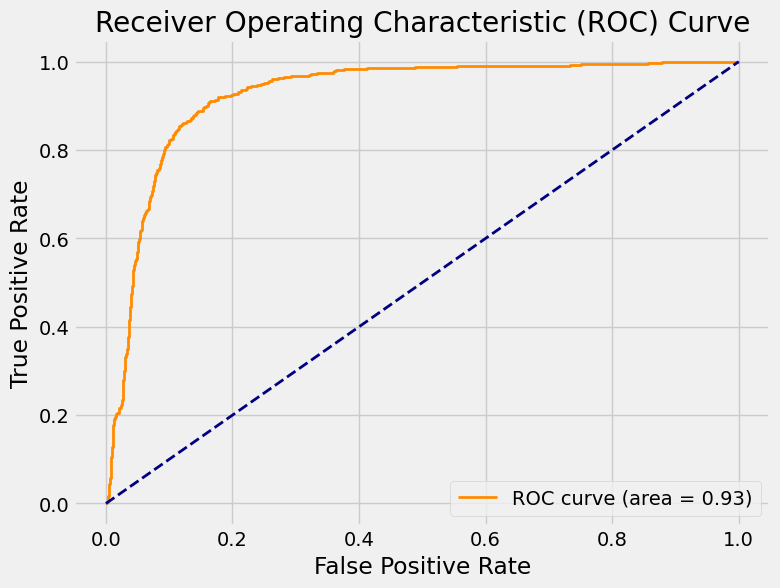

In [27]:
def evaluate_and_plot_roc_curve(model, X_test, y_test, color='darkorange'):
    # Predict probabilities
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = metrics.roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Usage example
evaluate_and_plot_roc_curve(lr, X_test_scaled, y_test)

Below is an implementation of a Random Forest model using XGBoost's XGBRFClassifier which is the chosen model for the classification task. It aims to optimize the model's hyperparameters by performing an extensive search through various parameter combinations. 

The parameters considered include `n_estimators,` `max_depth,` `learning_rate,` `subsample,` `colsample_bynode,` `reg_lambda,` `gamma,` and `min_child_weight.` The `GridSearchCV` function is employed to find the best combination of these parameters, with a focus on maximizing the `roc_auc` scoring metric. The search is conducted with parallel processing (`n_jobs=-1`) and cross-validation (`cv=3`) to enhance efficiency and reliability. 

The outcome will be an optimized Random Forest model for the given task.

### Tuned Model

XGBRFClassifier

In [28]:
# random forest model
xgbrf = XGBRFClassifier(random_state=1)

# params to search
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [3, 5, 7],          
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],         
    'colsample_bynode': [0.8, 1.0],  
    'reg_lambda': [0, 1, 10],        
    'gamma': [0, 0.1, 0.2],          
    'min_child_weight': [1, 5, 10],  
}

# find best params
grid = GridSearchCV(xgbrf, param_grid, scoring='roc_auc', n_jobs=-1, cv=3, verbose=1)

The hypertuning took about ~ 30 minutes. Code is commented out after finding best parameters.

In [29]:
# # fit GridSearchCV
# grid.fit(X_train_scaled, y_train)

In [30]:
# # print best model info
# print('grid.best_score_:', grid.best_score_, '\n')
# print('grid.best_estimator_:', grid.best_estimator_, '\n')
# print('grid.best_params_:', grid.best_params_)

In [31]:
# best params
best_grid_params = {'colsample_bynode': 0.8, 
                    'gamma': 0, 
                    'learning_rate': 0.01, 
                    'max_depth': 7, 
                    'min_child_weight': 1, 
                    'n_estimators': 200, 
                    'reg_lambda': 0, 
                    'subsample': 0.8}

In [32]:
# # save model

# # import joblib
# import joblib

# joblib.dump(grid, 'xgbrf_model.joblib')

# # load the model
# grid_model = joblib.load('xgbrf_model.joblib')

In [33]:
# # best estimator
# grid_model.best_estimator_

In [34]:
# optimize the model w/ best params
xgbrf_opt = XGBRFClassifier(random_state=1, **best_grid_params)
xgbrf_opt.fit(X_train_scaled, y_train)

xgb_pred = xgbrf_opt.predict(X_test_scaled)

# evaluation
print("Accuracy:", metrics.accuracy_score(y_test, xgb_pred), '\n')
print("Precision:", metrics.precision_score(y_test, xgb_pred), '\n')
print("Recall:", metrics.recall_score(y_test, xgb_pred), '\n')
print("F1 Score:", metrics.f1_score(y_test, xgb_pred), '\n')
print("roc_auc_score:", metrics.roc_auc_score(y_test,  xgbrf_opt.predict_proba(X_test_scaled)[:, 1]), '\n')
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, xgb_pred), '\n')
print("Classification Report:\n", metrics.classification_report(y_test, xgb_pred))

Accuracy: 0.9805333333333334 

Precision: 0.9869358669833729 

Recall: 0.9305711086226204 

F1 Score: 0.9579250720461095 

roc_auc_score: 0.9882546198978481 

Confusion Matrix:
 [[2846   11]
 [  62  831]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2857
           1       0.99      0.93      0.96       893

    accuracy                           0.98      3750
   macro avg       0.98      0.96      0.97      3750
weighted avg       0.98      0.98      0.98      3750



The model appears to perform very well, with high accuracy, precision, recall, and F1 score. The ROC AUC score suggests strong discriminative power, and the confusion matrix and classification report offer detailed insights into the model's performance for both classes.

In more details:

1. **Accuracy (0.9805):** Accuracy is the ratio of correctly predicted instances to the total instances in the dataset. In this case, the model has an accuracy of approximately 98.05%, indicating that it correctly predicts the class of 98.05% of the data.

2. **Precision (0.9869):** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It's a measure of the model's exactness. A precision of 0.9869 suggests that when the model predicts a positive class, it is correct 98.69% of the time.

3. **Recall (0.9306):** Recall, also known as Sensitivity or True Positive Rate, is the ratio of correctly predicted positive observations to the actual positive observations. A recall of 0.9306 indicates that the model can capture 93.06% of all actual positive cases.

4. **F1 Score (0.9579):** The F1 Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. An F1 score of 0.9579 suggests a good balance between precise positive predictions and capturing most of the actual positives.

5. **roc_auc_score (0.9883):** The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score measures the area under the ROC curve. It's an indicator of the model's ability to distinguish between the two classes. A score of 0.9883 indicates that the model's ability to differentiate between classes is very high.

6. **Confusion Matrix:**
   - True Positives (TP): 831 instances were correctly predicted as positive.
   - True Negatives (TN): 2846 instances were correctly predicted as negative.
   - False Positives (FP): 11 instances were incorrectly predicted as positive.
   - False Negatives (FN): 62 instances were incorrectly predicted as negative.


7. **Classification Report:** This report provides a summary of various classification metrics for both classes (0 and 1). It includes precision, recall, and F1-score for each class, along with support, which is the number of occurrences of each class in the dataset. The macro and weighted averages provide an overall view of the model's performance across classes.

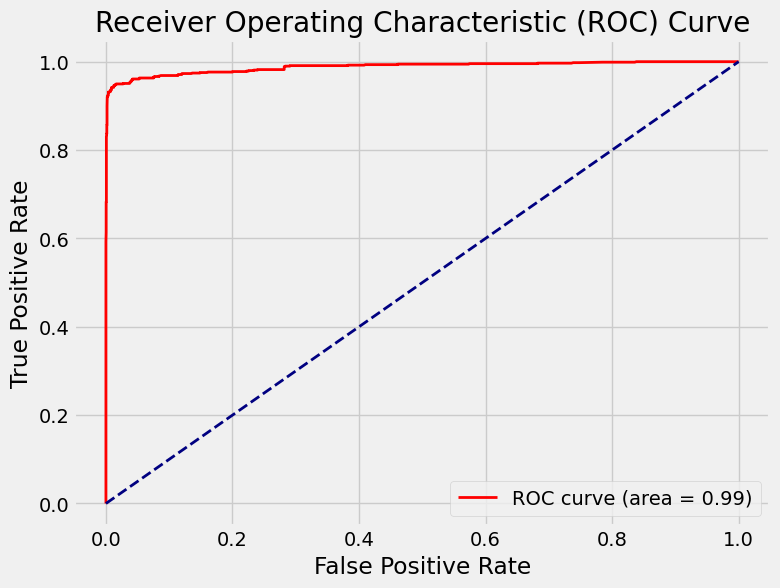

In [35]:
# roc curve of new & optimize model
evaluate_and_plot_roc_curve(xgbrf_opt, X_test_scaled, y_test, color='red')

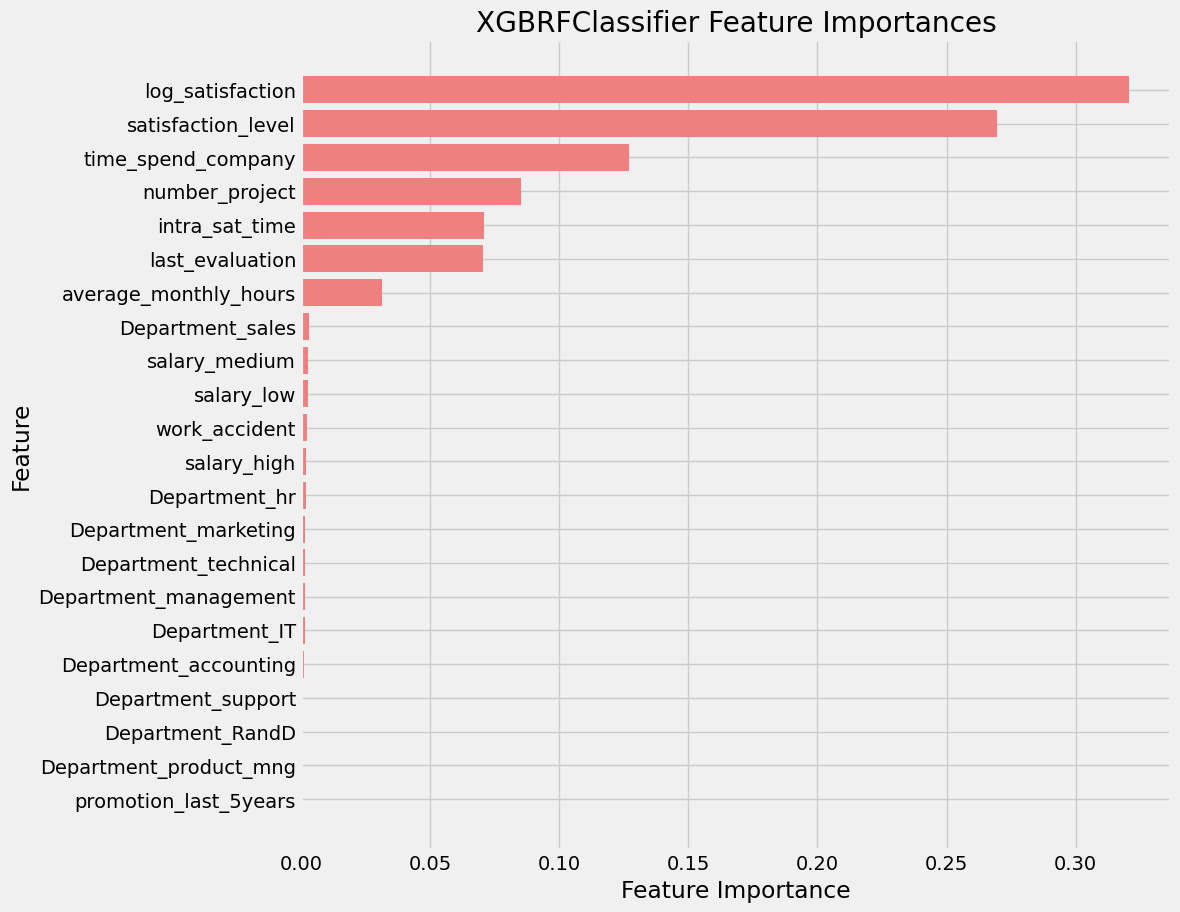

In [36]:
# best features
feature_importances = xgbrf_opt.feature_importances_

# column names
feature_names = X_train.columns

# dataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightcoral')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBRFClassifier Feature Importances')
plt.show()

In [37]:
# top 5 features
importance_df[:-6:-1]

,Feature,Importance
7,log_satisfaction,0.320823
0,satisfaction_level,0.269545
4,time_spend_company,0.127136
2,number_project,0.085060
8,intra_sat_time,0.071081


Here's an explanation of the top 5 features based on their importance scores:

🖌 = engineered features

1. **🖌 log_satisfaction (Feature 7, Importance 0.320823):** This feature has the highest importance score, indicating that it is the most influential in the model's predictions. It might represent the logarithm of an employee's satisfaction level. A higher log_satisfaction suggests a stronger positive influence on the model's output.

2. **satisfaction_level (Feature 0, Importance 0.269545):** The satisfaction level of employees is the second most important feature. It significantly affects the model's predictions, and higher satisfaction levels are associated with positive outcomes.

3. **time_spend_company (Feature 4, Importance 0.127136):** The number of years an employee has spent with the company is the third most important feature. It indicates that the duration of employment has a notable impact on the model's predictions.

4. **number_project (Feature 2, Importance 0.085060):** The number of projects an employee is involved in is the fourth most important feature. It suggests that the workload, as measured by the number of projects, is a relevant factor in the model's predictions.

5. **🖌 intra_sat_time (Feature 8, Importance 0.071081):** This feature, related to the time an employee spends within the company, is the fifth most important. It appears to capture some aspect of an employee's tenure or engagement with the company.

These feature importance scores provide insights into which attributes are most influential in the context of the model's predictions. In this case, employee satisfaction-related features, time-related features, and workload-related features are among the most significant contributors to the model's outcomes.